## Bitcoin Price Volatility - Spring 2017
Exploring Bitcoin's volatility using a combination of economic features obtained from the [Financial Reserve](https://fred.stlouisfed.org) dataset. This was my first time using the k-Nearest Neighbors _Regression_ algorithm and I was delighted by its ability to interpolate!

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

btc = pd.read_csv('C:\\Users\Whosteen\Desktop\\bitprice.csv', names = ['Date','Price','Day'], parse_dates = True)
econ = pd.read_csv('C:\\Users\Whosteen\Desktop\econbtc.csv', names = ['Date','VIX','OIL','1YT','DOLLAR','FFR','GOLD','SP500','INF','LIBOR'], parse_dates = True)


In [2]:
#weekend values are absent for feature data

econ.head()

,Date,VIX,OIL,1YT,DOLLAR,FFR,GOLD,SP500,INF,LIBOR
0,4/13/2011,16.92,106.60,0.23,95.6372,0.08,1458.0,1314.41,2.92,0.21875
1,4/14/2011,16.27,107.73,0.25,95.5073,0.09,1457.5,1314.52,2.99,0.21585
2,4/15/2011,15.32,109.17,0.24,95.4257,0.12,1472.5,1319.68,2.99,0.21375
3,4/18/2011,16.96,106.70,0.24,95.9128,0.10,1484.5,1305.14,3.01,0.21295
4,4/19/2011,15.83,107.18,0.24,95.4997,0.10,1495.0,1312.62,3.02,0.21260


In [3]:
btc.head()

,Date,Price,Day
0,4/13/2011 0:00,0.92,w
1,4/14/2011 0:00,1.00,th
2,4/15/2011 0:00,0.99,f
3,4/16/2011 0:00,1.05,s
4,4/17/2011 0:00,1.11,s


In [4]:
#filter btc price data for non-weekend entries indicated by Day = s

btc = btc[btc.Day != 's']
btc[-20:]

,Date,Price,Day
2175,3/27/2017 0:00,1040.49,m
2176,3/28/2017 0:00,1044.25,t
2177,3/29/2017 0:00,1040.39,w
2178,3/30/2017 0:00,1037.53,th
2179,3/31/2017 0:00,1079.75,f
2182,4/3/2017 0:00,1147.63,m
2183,4/4/2017 0:00,1143.75,t
2184,4/5/2017 0:00,1135.00,w
2185,4/6/2017 0:00,1190.60,th
2186,4/7/2017 0:00,1193.02,f


In [5]:
'''
features for current month were not yet available. 
As a result, the last month of daily price data was excluded.
'''

btc = btc[:-20]

In [6]:
bitprice = btc['Price'].values.tolist()
print(bitprice[-20:])
print(len(bitprice))

[1194.28, 1190.89, 1230.02, 1260.92, 1290.79, 1280.87, 1232.43, 1150.48, 1191.81, 1117.02, 1243.24, 1246.31, 1259.6, 1172.91, 1070.13, 1041.34, 1115.04, 1037.44, 1029.95, 935.95]
1553


In [10]:
#merge btc price data with features

bp = pd.Series(bitprice)
data = econ
data['BTC'] = bp.values
data[-20:]

,Date,VIX,OIL,1YT,DOLLAR,FFR,GOLD,SP500,INF,LIBOR,BTC
1533,2/27/2017,12.09,54.04,0.81,125.2778,0.66,1256.25,2369.75,2.16,0.78444,1194.28
1534,2/28/2017,12.92,54.00,0.88,125.5992,0.57,1251.90,2363.64,2.15,0.78889,1190.89
1535,3/1/2017,12.54,53.82,0.92,126.0440,0.66,1246.05,2395.96,2.22,0.81056,1230.02
1536,3/2/2017,11.81,52.63,0.98,126.4661,0.66,1243.30,2381.92,2.18,0.83000,1260.92
1537,3/3/2017,10.96,53.33,0.98,126.2717,0.66,1228.75,2383.12,2.16,0.83444,1290.79
1538,3/6/2017,11.24,53.19,0.97,126.0546,0.66,1231.15,2375.31,2.12,0.84667,1280.87
1539,3/7/2017,11.45,52.68,1.02,126.0469,0.66,1223.70,2368.39,2.14,0.85444,1232.43
1540,3/8/2017,11.86,49.83,1.03,126.5172,0.66,1213.30,2362.98,2.12,0.85778,1150.48
1541,3/9/2017,12.30,48.75,1.04,126.6562,0.66,1204.60,2364.87,2.11,0.88139,1191.81
1542,3/10/2017,11.66,48.05,1.03,126.2599,0.66,1196.55,2372.60,2.12,0.89056,1117.02


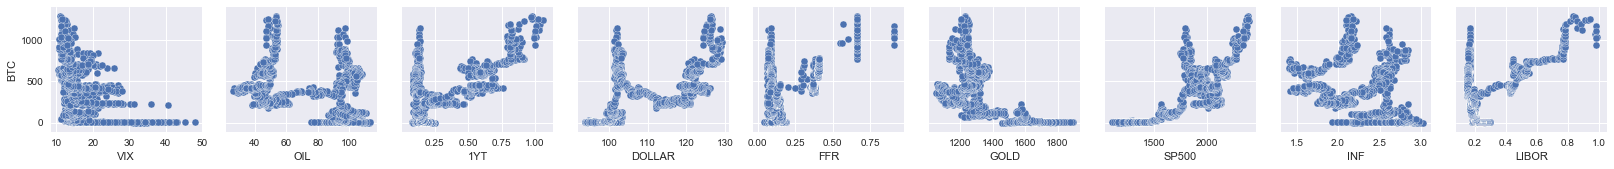

In [11]:
#explore pair plot with btc for visual of correlation

pp = sns.pairplot(data, x_vars=['VIX','OIL','1YT','DOLLAR','FFR','GOLD','SP500','INF','LIBOR'], y_vars='BTC')

In [36]:
#prepare data for processing and fit a linear model

from sklearn import linear_model, preprocessing
from sklearn.model_selection import train_test_split, cross_val_score

model = linear_model.LinearRegression()
# features
X = np.array(data[['VIX','OIL','1YT','DOLLAR','FFR','GOLD','SP500','INF','LIBOR']])
X = preprocessing.scale(X)
# response
y = np.array(data['BTC'])

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#training
model.fit(X_train,y_train)
print ("intercept=", model.intercept_)
print ("coefficients=", model.coef_)
print ("variance score=", model.score(X_test, y_test))
print ("Root Mean squared error: %.2f" % ((np.mean((model.predict(X_test) - y_test)** 2))**(1/2))

intercept= 300.393581422
coefficients= [  83.70142079   97.65243005    7.10734679 -143.41476024    6.63080365
  -70.37735032  338.32548548   34.84814715  174.87588814]
variance score= 0.799890827179
Mean squared error: 16128.23


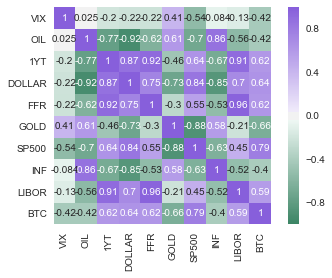

In [180]:
'''
Correlation matrix indicates significant correlation between many features. In fact,
too many features are correlated to simply drop.
'''


corr = data[['VIX','OIL','1YT','DOLLAR','FFR','GOLD','SP500','INF','LIBOR','BTC']].corr()
cmap = sns.diverging_palette(150,275, as_cmap=True)
sns.heatmap(corr,cmap=cmap,square=True,annot=True)

In [14]:
#generate range of regularization terms from -10 to 50

alphas = 10*np.linspace(10,-2)*0.5
alphas

array([ 50.        ,  48.7755102 ,  47.55102041,  46.32653061,
        45.10204082,  43.87755102,  42.65306122,  41.42857143,
        40.20408163,  38.97959184,  37.75510204,  36.53061224,
        35.30612245,  34.08163265,  32.85714286,  31.63265306,
        30.40816327,  29.18367347,  27.95918367,  26.73469388,
        25.51020408,  24.28571429,  23.06122449,  21.83673469,
        20.6122449 ,  19.3877551 ,  18.16326531,  16.93877551,
        15.71428571,  14.48979592,  13.26530612,  12.04081633,
        10.81632653,   9.59183673,   8.36734694,   7.14285714,
         5.91836735,   4.69387755,   3.46938776,   2.24489796,
         1.02040816,  -0.20408163,  -1.42857143,  -2.65306122,
        -3.87755102,  -5.10204082,  -6.32653061,  -7.55102041,
        -8.7755102 , -10.        ])

In [15]:
# Ridge Regression tuning for regularization term

from sklearn.linear_model import Ridge, RidgeCV

ridgecv = RidgeCV(alphas=alphas,normalize=True)
ridgecv.fit(X_train,y_train)
ridgecv.alpha_

1.020408163265305

In [18]:
ridge = Ridge(alpha=ridgecv.alpha_, normalize=True)
ridge.fit(X_train,y_train)
print ("intercept=", ridge.intercept_)
print ("coefficients=", ridge.coef_)
print ("variance score=", ridge.score(X_test, y_test))
print ("Root Mean squared error: %.2f" % ((np.mean((ridge.predict(X_test) - y_test)** 2))**(1/2))

intercept= 305.188447263
coefficients= [-25.10526957  10.55451522  22.3669883   20.20938853  33.29745068
 -47.17658349  59.51189477   1.0837905   35.17561049]
variance score= 0.618866705589
Mean squared error: 32601.85


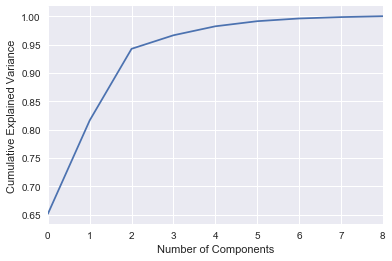

In [19]:
#transform the feature set and plot retained variance for each component

from sklearn.decomposition import PCA
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,8,1)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [48]:
#transform feature set with 3 components and re-fit linear model

sklearn_pca = PCA(n_components=3)
X_proj = sklearn_pca.fit_transform(X)

Xp_train, Xp_test, yp_train, yp_test = train_test_split(X_proj,y,test_size=0.2)
model.fit(Xp_train,yp_train)
print ("intercept=", model.intercept_)
print ("coefficients=", model.coef_)
print ("variance score=", model.score(Xp_test, yp_test))

intercept= 307.155204345
coefficients= [ 85.21707897 -55.67262919 -68.97984565]
variance score= 0.577040420557


In [54]:
# polynomial regression
#3rd or 4th degree retains most variance for model complexity
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = range(5)

for d in degree:
    poly_feat = PolynomialFeatures(d)
    lin_reg = linear_model.LinearRegression()
    poly_model = make_pipeline(poly_feat,lin_reg)
    poly_model.fit(Xp_train,yp_train)
    print('Degree:',d," var score = ", poly_model.score(Xp_test, yp_test))

Degree: 0  var score =  -0.00410398481064
Degree: 1  var score =  0.577040420557
Degree: 2  var score =  0.800364555472
Degree: 3  var score =  0.872730213521
Degree: 4  var score =  0.886269617849


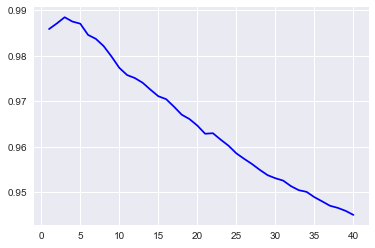

In [41]:
#KNN tuning for k from 1 to the sq root of the length of dataset ~1600

from sklearn.model_selection import KFold
i = 1
cv_results = []
k = []
kfold = KFold(n_splits = 10)
while i < 41:
    knr = KNeighborsRegressor(i)
    knr.fit(X_train,y_train)
    cv_scores = cross_val_score(knr, X_train,y_train, cv=kfold)
    cv_results.append(cv_scores.mean())
    k.append(i)
    i += 1
plt.plot(k,cv_results, 'b')

In [42]:
#variance score for knn tuning, k=3 retains the most variance

print(cv_results)

[0.985832913420845, 0.98706737820297596, 0.98842536062995412, 0.98747485833708326, 0.98701222255867604, 0.98454645277248987, 0.98367187917931465, 0.98208154909105105, 0.97981075329066702, 0.97731987988844193, 0.97572925071539485, 0.97506197638175984, 0.97402614268894783, 0.97250621376650381, 0.97107781155449246, 0.97043465832620102, 0.96879001110345508, 0.96702185672409657, 0.96604995205778388, 0.96463103309332365, 0.96283303419823518, 0.96294236638782993, 0.96152622068222304, 0.96020135926945716, 0.9585248724244988, 0.95732178527410261, 0.95618657135197682, 0.95490372611282714, 0.95373656578447241, 0.95305454724064942, 0.95253826596527791, 0.95131797937361817, 0.95043309121559072, 0.9500620126810706, 0.9488984970445653, 0.94796934948933786, 0.94700765155354583, 0.94654578348388829, 0.94589177804643154, 0.94499804318547143]


In [44]:
#KNN
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(3)
knr.fit(X_train,y_train)
print ("variance score=", knr.score(X_test, y_test))
print ("Root Mean squared error: %.2f" % ((np.mean((knr.predict(X_test) - y_test)** 2))**(1/2))

variance score= 0.987706011573
Mean squared error: 990.86
